### Подключение зависимостей

In [1]:
import pandas as pd
import numpy as np
import joblib
import matplotlib.pyplot as plt
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler

from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import LSTM, Dense, Input

from functions_for_predictions import process_data, make_predictions, prediction_plot, make_predictions, plot_only_predictions,\
plot_only_predictions

In [2]:
scaler = joblib.load('scaler.pkl')
model = tf.keras.models.load_model('model2700.keras')

C:\Users\sysoe\AppData\Roaming\Python\Python311\site-packages\keras\src\saving\saving_lib.py:719: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 7 variables whereas the saved optimizer has 12 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


### Первичная обработка данных

In [3]:
data = process_data('1 есду.xlsx')

### Построение графика начальных данных¶

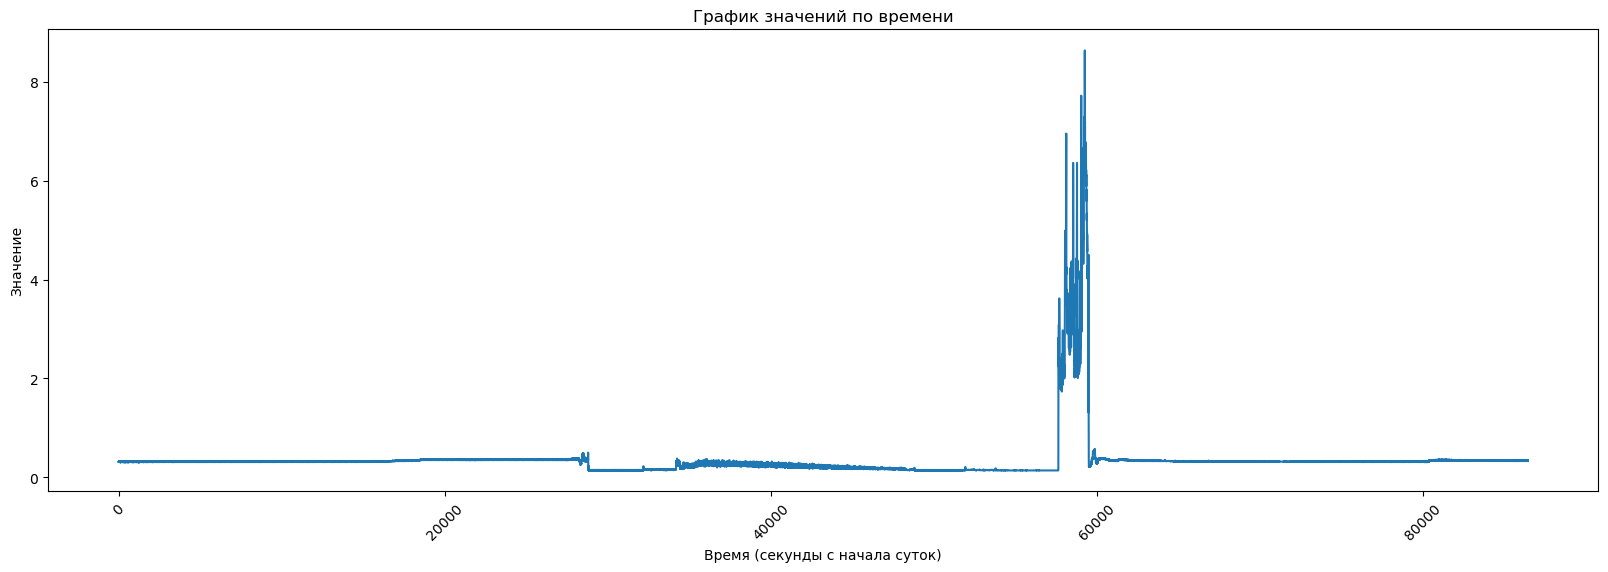

In [4]:
plt.figure(figsize=(20, 6))
plt.plot(data['seconds'], data['value'])
plt.xlabel('Время (секунды с начала суток)')
plt.ylabel('Значение')
plt.title('График значений по времени')
plt.xticks(rotation=45) 
plt.show()

### Предсказание

In [5]:
pred = make_predictions(data, 43000, 2700, model, scaler)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 141ms/step


### Построение графика предсказания

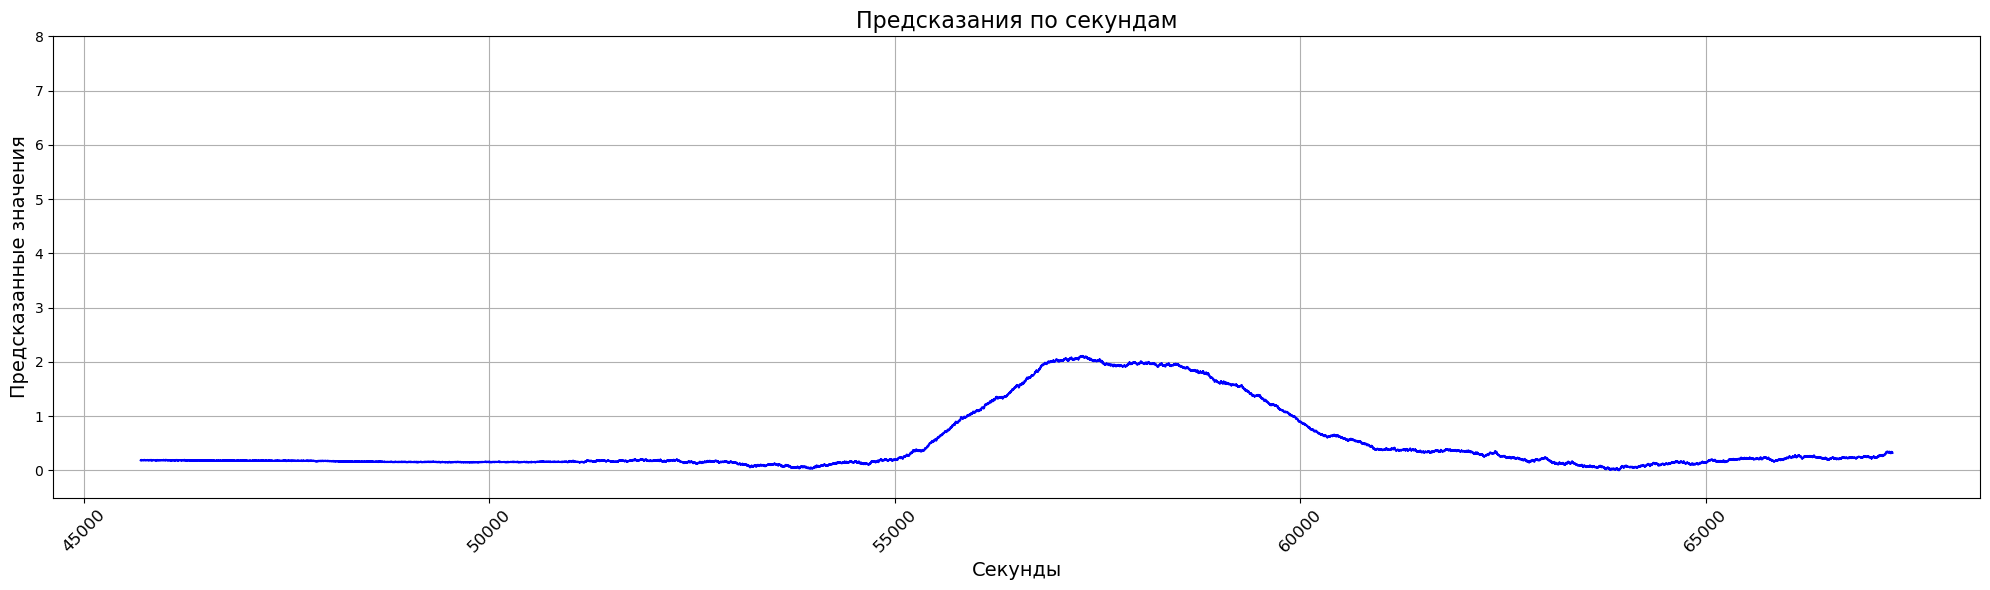

In [6]:
plot_only_predictions('predictions.xlsx')

### Построение графика для сравнения реальных значений и предсказанных

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


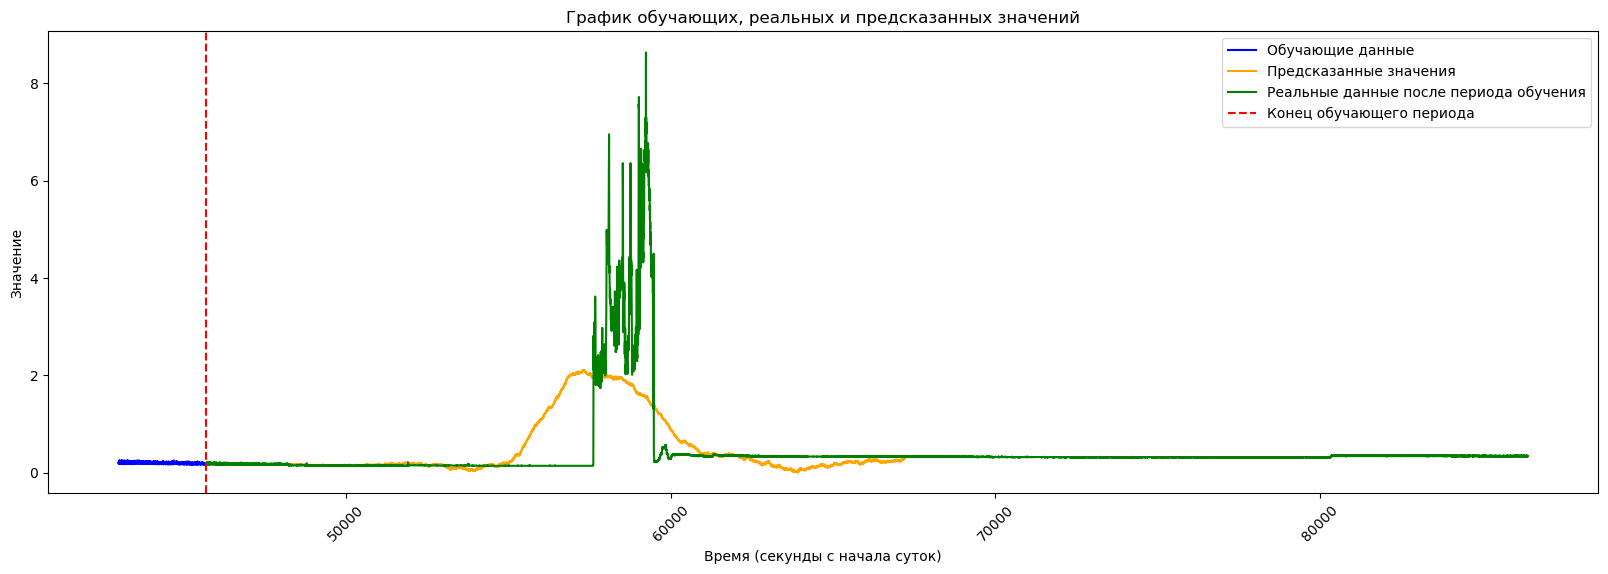

In [7]:
prediction_plot(data, 43000, 6, 2700, model, scaler)

### Информация о модели

In [ ]:
%load_ext tensorboard
%tensorboard --logdir=logs